[View in Colaboratory](https://colab.research.google.com/github/chanansh/right_by_why/blob/master/part_1_feature_importance_reminder.ipynb)

# Right, but Why? - Reasoning a Model's Outcome

## Abstract

You have built a fraud-detection system with terrific performance. Everyone in the data-science department are happy. However, the human-analyst who need to approve the account closure is unsatisfied. She wants to know why your model is so sure the user is fraud. This scenario repeats in many business and scientific scenarios: the predictions of a model are not enough, as it is also necessary to explain why caused the model to make the current decision. It is important not to confuse this with Feature Importance which aim is to find the overall important features in the entire dataset. Here we are interested in the fetures who influenced the most on the decision of the *current* sample.



# Feature Importance

## Load Data

In [0]:
import sklearn
import seaborn
%pylab inline
import pandas as pd
mpl.rcParams['figure.figsize'] = [5.0, 5.0]
mpl.rcParams['figure.dpi'] = 150


In [0]:
# data = datasets.load_breast_cancer()
# fm = data['data']
# y = data['target']
# feature_names = data['feature_names']
fm, y = sklearn.datasets.make_classification(random_state=1, 
                                     n_samples=10000, n_clusters_per_class=2,
                                     n_informative=2, n_features=10,
                                     n_redundant=0, class_sep=1.5, scale=None,hypercube=True)

## Linear Model

In [0]:
model = sklearn.linear_model.LogisticRegression()
model.fit(fm, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Feature Importance

Text(0,0.5,'feature index')

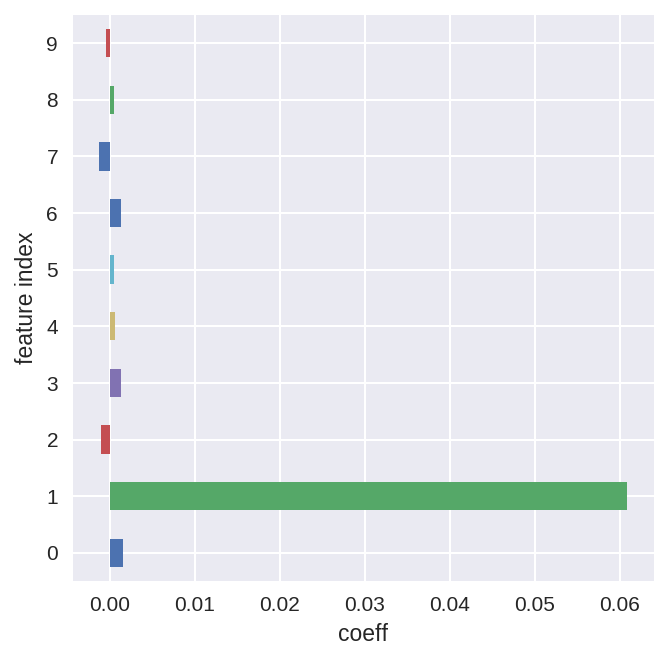

In [0]:
coef = pd.Series(model.coef_[0])
coef.plot(kind='barh')
plt.xlabel('coeff')
plt.ylabel('feature index')

coef.sort_values(*italicized text*)

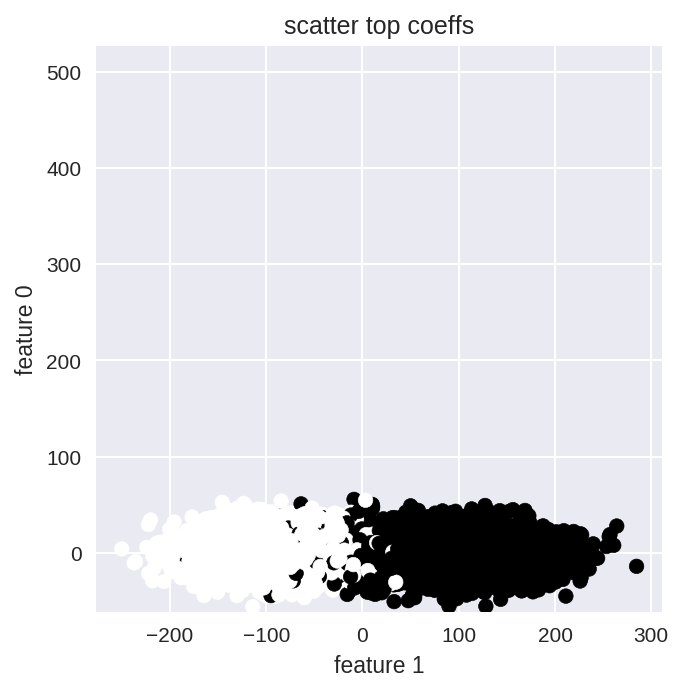

In [0]:
def plot_top2_coeff(coef, fm, y):
  top2 = coef.abs().sort_values(ascending=False).head(2).index
  plt.scatter(fm[:,top2[0]], fm[:,top2[1]], c=y)
  plt.title('scatter top coeffs')
  plt.xlabel('feature %d'% top2[0])
  plt.ylabel('feature %d'% top2[1])
  plt.axis('square')
  
plot_top2_coeff(coef,fm, y)

## WRONG! 
![wrong](https://media1.giphy.com/media/hPPx8yk3Bmqys/200w.webp)

## Features were not born equal

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aab07e518>,
      dtype=object)

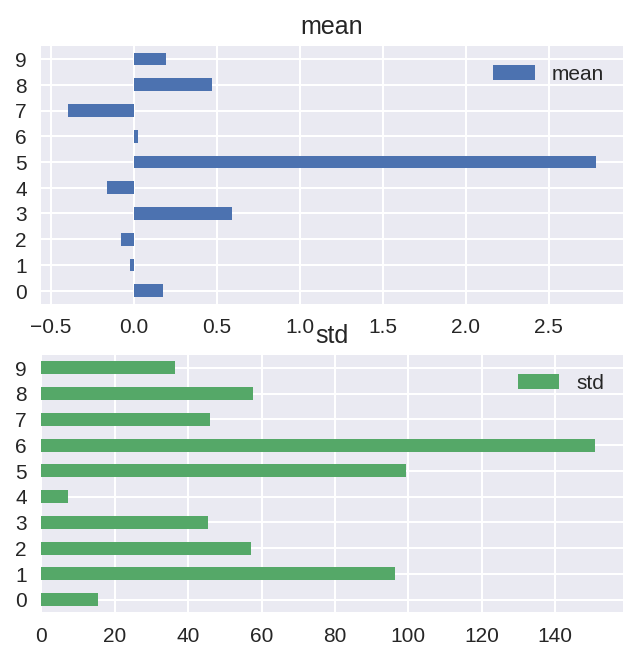

In [0]:
pd.DataFrame(fm).agg(["mean","std"]).T.plot(kind="barh", subplots=True, sharex=False)


## Feature Normalization

Text(0,0.5,'feature index')

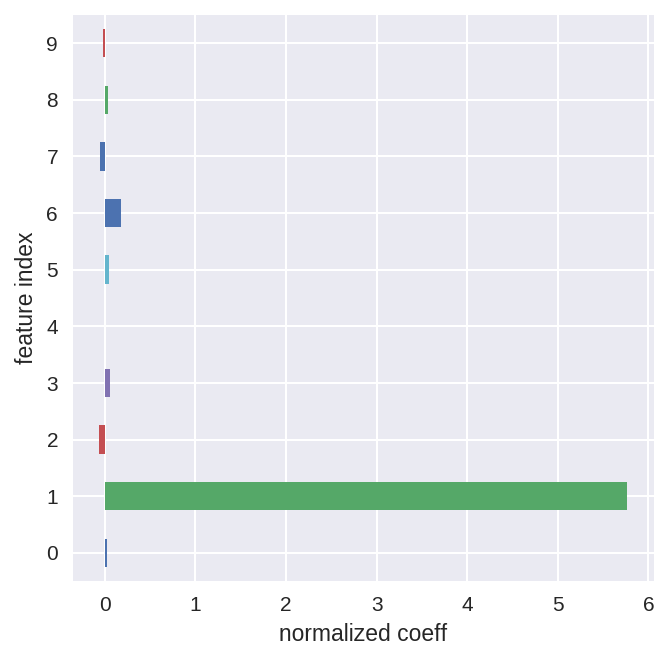

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), model)
pipeline.fit(fm, y)
coef_normalized = pd.Series(pipeline.steps[1][1].coef_[0])
coef_normalized.plot(kind='barh');
plt.xlabel('normalized coeff')
plt.ylabel('feature index')

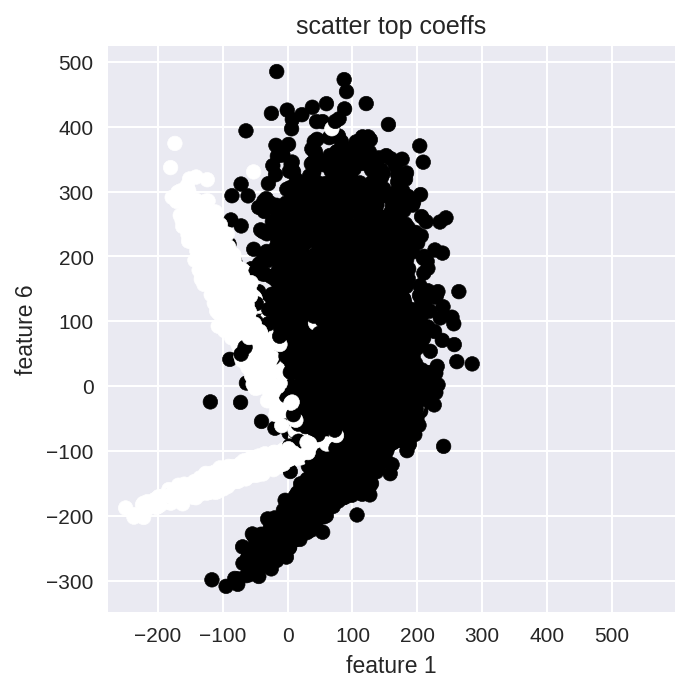

In [0]:
plot_top2_coeff(coef_normalized, fm, y)

## Always compare to chance results to learn on significance

Text(0.5,1,'approximate z-score')

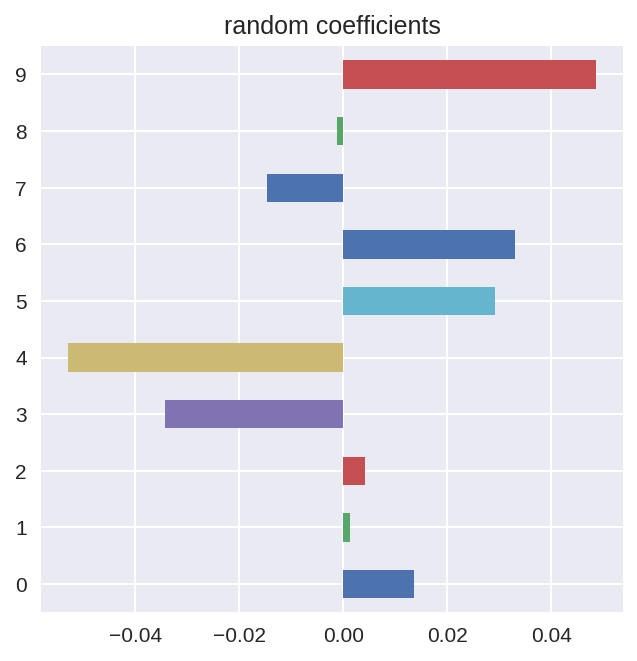

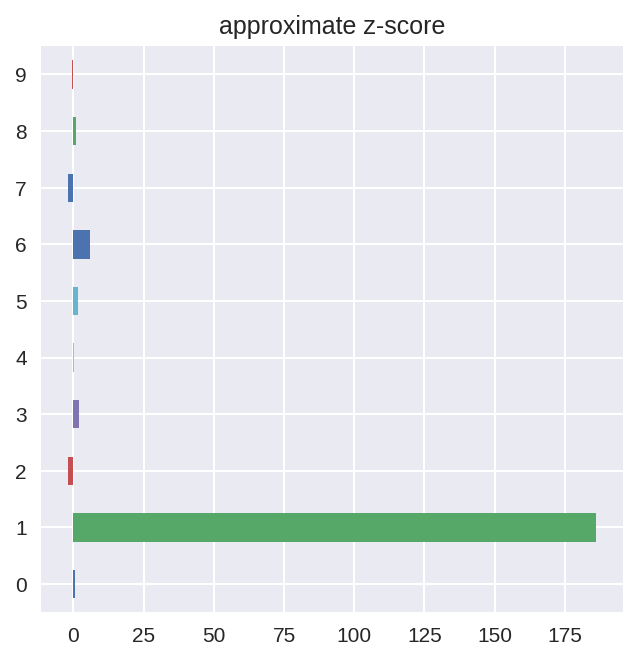

In [0]:
pipeline.fit(fm, sklearn.utils.shuffle(y))
coef_random = pd.Series(pipeline.steps[1][1].coef_[0])
coef_random.plot(kind='barh');
plt.title('random coefficients')
plt.figure()

coef_z = coef_normalized/coef_random.std()
coef_z.plot(kind='barh');
plt.title('approximate z-score')

NOTE: There is also an analytical approach to comupte logistic regression coefficient's p-value. See [P values for sklearn logistic regression](https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d)



# Considering the single sample
So far we have discussed just feature importance in general. 

** What about the single-sample feature importance? **


## Split to Train-Test

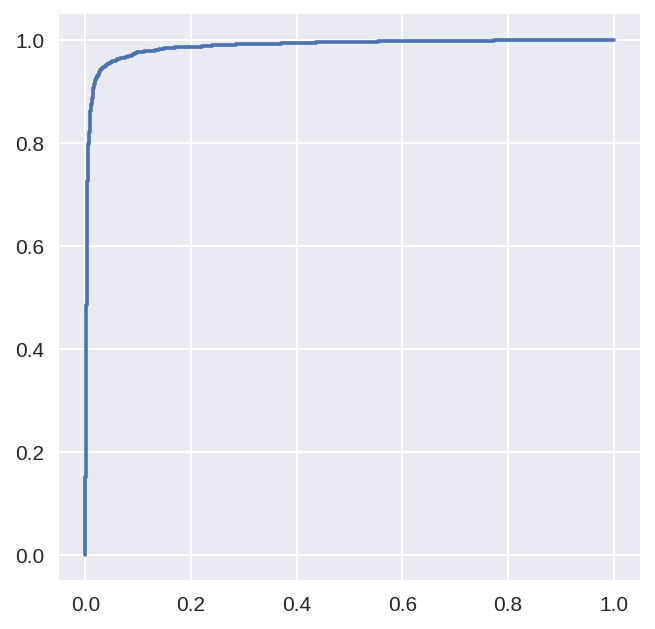

In [0]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(n=len(y), n_iter=1, random_state=42, test_size=0.5)
for train_idx, test_idx in cv:
  pass
fm_train = fm[train_idx, :]
y_train = y[train_idx]
fm_test = fm[test_idx, :]
y_test = y[test_idx]

pipeline.fit(fm_train, y_train)
y_hat = pipeline.predict_proba(fm_test)[:,1]
from sklearn.metrics import roc_curve
fp, tp, th = roc_curve(y_true=y_test, y_score=y_hat)
plt.plot(fp, tp,'-');

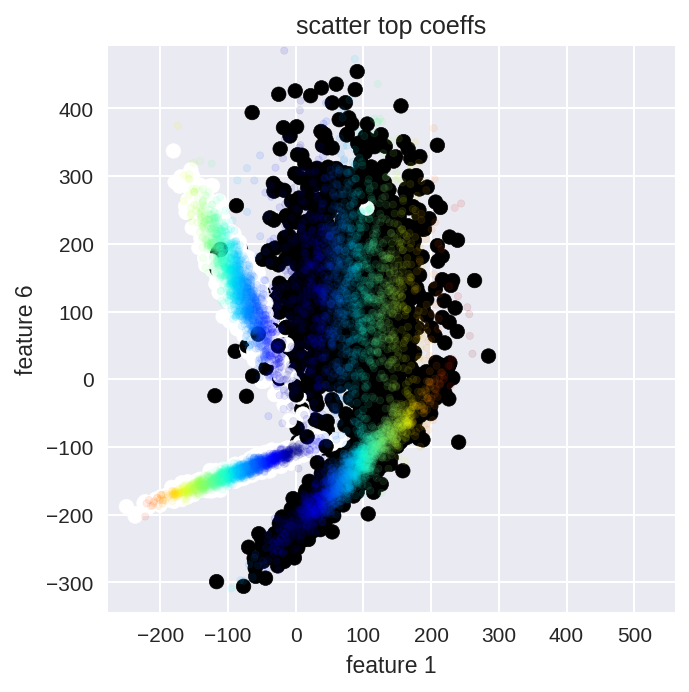

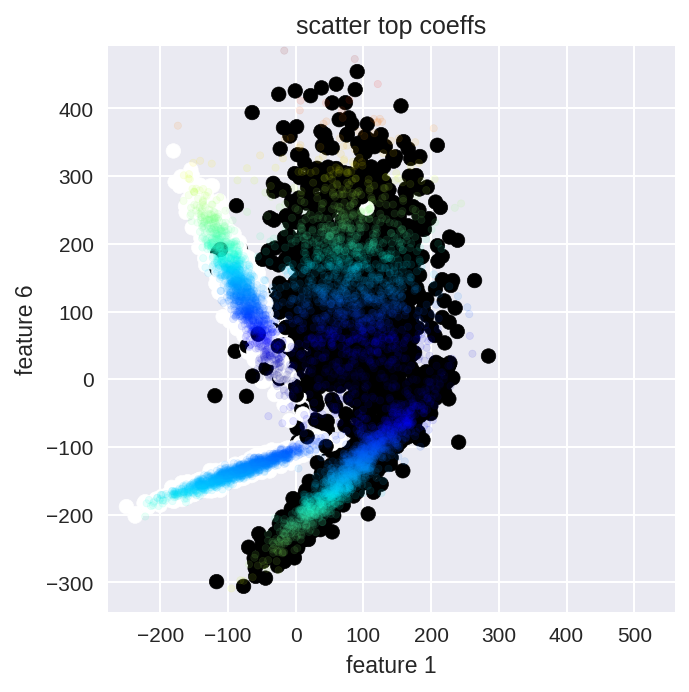

In [0]:
fm_test_normalized = pipeline.steps[0][1].transform(fm_test)
coef = pipeline.steps[1][1].coef_[0]
weight = coef * fm_test_normalized
top2 = coef.argsort()[::-1][:2]
plot_top2_coeff(coef=pd.Series(coef), fm=fm_train, y=y_train)
plt.scatter(fm_test[:, top2[0]], fm_test[:, top2[1]], c=abs(weight[:, top2[0]]), cmap='jet', alpha=0.1, marker='.')
plt.figure()
plot_top2_coeff(coef=pd.Series(coef), fm=fm_train, y=y_train)
plt.scatter(fm_test[:, top2[0]], fm_test[:, top2[1]], c=abs(weight[:, top2[1]]), cmap='jet', alpha=0.1, marker='.')

Populating the interactive namespace from numpy and matplotlib


(10000, 10000)

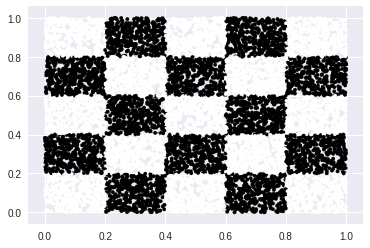

In [0]:
fm = pd.np.random.rand(10000,10000)
y = pd.np.logical_xor(pd.np.mod(fm[:,0]*5,2)>1, pd.np.mod(fm[:,1]*5,2)>1)
plt.scatter(fm[:,0],fm[:,1],c=y,marker='.')
fm.shape

In [0]:
fro

# References



1.   "Why Should I Trust You?": Explaining the Predictions of Any Classifier - [pdf](https://arxiv.org/abs/1602.04938)
2.   List item
